# Defining the fundamental zone

> **Goal**: The fundamental zone is the minimum amount of orientation space required to describe all possible crystal orientations (contents all but only unique orientation descriptions).

In [1]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

import ftir_funct as f

module FTIR v.2024.4.11 imported


In [2]:
# generate values to plot the reference envelope when required
polar, azimuths = f.regular_S2_grid(n_squared=100)
T = f.Tvalues(trans=(90, 50, 20), azimuth=azimuths, polar=polar)
x, y, z = f.sph2cart(T, azimuths, polar)

# normalize colors for T values to max and min values
Tmax, Tmin = T.max(), T.min()
Tcolors = (T - Tmin) / (Tmax - Tmin)

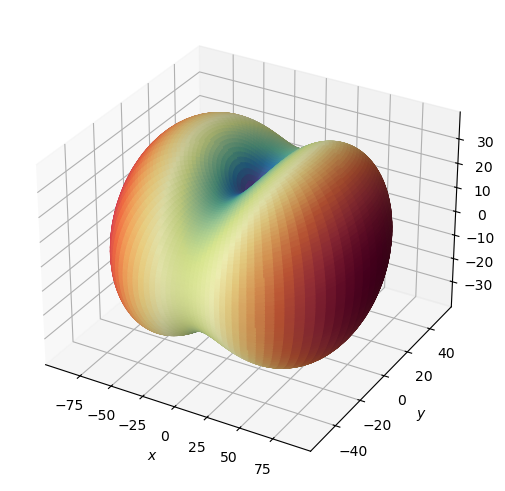

In [3]:
# make plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, constrained_layout=True)

ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=cm.Spectral_r(Tcolors))
_ = ax.set_xlabel(r'$x$'), ax.set_ylabel(r'$y$'), ax.set_zlabel(r'$z$')

Let's rotate the envelope using Euler angles (Bunge convention, extrinsic rotation). In the Bunge Euler angle convention, an arbitrary orientation is determined by three successive rotations in the sample reference frame. The first is about the z-axis, the second about the x-axis, and the third again about the z-axis.

In [4]:
# rotate the envelope using Euler angles (Bunge convention, extrinsic rotation)
rot_x, rot_y, rot_z = f.rotate(coordinates=(x, y, z), euler_ang=(30, 45, 60))

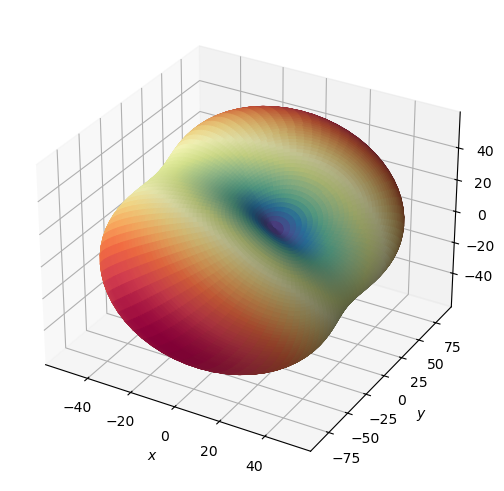

In [5]:
# check making a plot
fig2, ax = plt.subplots(subplot_kw={"projection": "3d"}, constrained_layout=True)
ax.plot_surface(rot_x, rot_y, rot_z, rstride=1, cstride=1, facecolors=cm.Spectral_r(Tcolors))
_ = ax.set_xlabel(r'$x$'), ax.set_ylabel(r'$y$'), ax.set_zlabel(r'$z$')

The transmitance envelope has an orthorhombic mmm symmetry. In the Euler space for Bunge convention and intrinsic rotations ($\varphi_{1}, \phi, \varphi_{2}$) or ``zxz``, the range of angles is

$0^{\circ} \leq \varphi_{1} \leq 360^{\circ}$    
$0^{\circ} \leq \phi \leq 90^{\circ}$  
$0^{\circ} \leq \varphi_{3} \leq 180^{\circ}$

the fundamental zone is:

$0^{\circ} \leq \varphi_{1} \leq 90^{\circ}$    
$0^{\circ} \leq \phi \leq 90^{\circ}$  
$0^{\circ} \leq \varphi_{3} \leq 180^{\circ}$

> Source: https://www.researchgate.net/profile/Gert-Nolze/publication/261217017_Euler_angles_and_symmetry/links/00b7d535365d0590c6000000/Euler-angles-and-symmetry.pdf

Let's check this:

In [6]:
# rotations around phi 1 (Z)
ref = f.rotate(coordinates=(x, y, z), euler_ang=(0, 0, 0))
rotation_0 = f.rotate(coordinates=(x, y, z), euler_ang=(45, 0, 0))
rotation_1 = f.rotate(coordinates=(x, y, z), euler_ang=(90, 0, 0))
# rotations around Phi (X)
rotation_2 = f.rotate(coordinates=(x, y, z), euler_ang=(0, 45, 0))
rotation_3 = f.rotate(coordinates=(x, y, z), euler_ang=(0, 90, 0))
# combined rotations
rotation_4 = f.rotate(coordinates=(x, y, z), euler_ang=(0, 45, 180))
rotation_5 = f.rotate(coordinates=(x, y, z), euler_ang=(90, 90, 0))
rotation_6 = f.rotate(coordinates=(x, y, z), euler_ang=(0, 90, 90))
rotation_7 = f.rotate(coordinates=(x, y, z), euler_ang=(75, 90, 20))

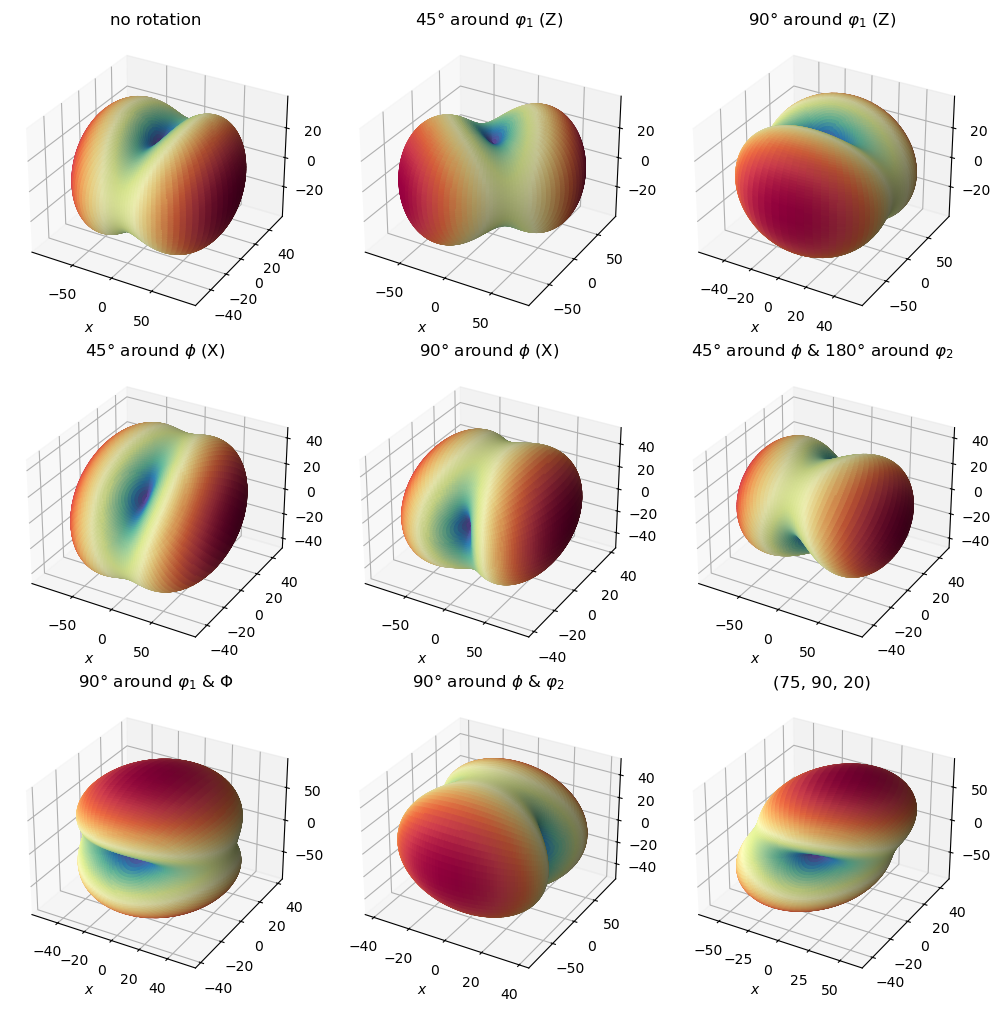

In [7]:
titles = [r'no rotation',
          r'45° around $\varphi_{1}$ (Z)',
          r'90° around $\varphi_{1}$ (Z)',
          r'45° around $\phi$ (X)',
          r'90° around $\phi$ (X)',
          r'45° around $\phi$ & 180° around $\varphi_{2}$',
          r'90° around $\varphi_{1}$ & $\Phi$',
          r'90° around $\phi$ & $\varphi_{2}$',
          r'(75, 90, 20)']

envelopes = [ref, rotation_0, rotation_1, rotation_2, rotation_3, rotation_4,
             rotation_5, rotation_6, rotation_7]

# make plot
fig, axes = plt.subplots(subplot_kw={"projection": "3d"}, ncols=3, nrows=3, figsize=(10, 10), constrained_layout=True)

for index, ax in enumerate(axes.flat):
    x, y, z = envelopes[index]
    ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=cm.Spectral_r(Tcolors))
    ax.set_xlabel(r'$x$')
    ax.set_title(titles[index])

Due to symmetry, there are equivalent orientations, i.e. the crystal orientation can be described by different but symmetry-equivalent sets of Euler angles. The number of equivalent orientations or multiplicity depends on the symmetry. In particular, if one uses the ``symmetrise()`` function for an olivine crystal in MTEX there are 8 equivalent Euler angles for each orientation.

```matlab
cs = crystalSymmetry('mmm', [4.8 10 6], 'mineral', 'Forsterite');
ori = orientation.byEuler(75*degree, 90*degree, 20*degree, cs)
symmetrise(ori)
```

```reStructuredText
ans = orientation (Forsterite → xyz)
  size: 8 x 1
 
  Bunge Euler angles in degree
  phi1  Phi phi2 Inv.
    75   90   20    0
   255   90  160    0
    75   90  200    0
   255   90  340    0
    75   90   20    1
   255   90  160    1
    75   90  200    1
   255   90  340    1
```

Let's check this

In [8]:
# generate values to plot the reference envelope when required
polar, azimuths = f.regular_S2_grid(n_squared=100)
T = f.Tvalues(trans=(90, 50, 20), azimuth=azimuths, polar=polar)
x, y, z = f.sph2cart(T, azimuths, polar)

ref = f.rotate(coordinates=(x, y, z), euler_ang=(0, 0, 0))


rotation_0 = f.rotate(coordinates=(x, y, z), euler_ang=(20, 90, 75))  ## order of operations inverted in order to work!
rotation_1 = f.rotate(coordinates=(x, y, z), euler_ang=(160, 90, 255))
rotation_2 = f.rotate(coordinates=(x, y, z), euler_ang=(200, 90, 75))
rotation_3 = f.rotate(coordinates=(x, y, z), euler_ang=(340, 90, 255))
# inverse
# rotation_4 = f.rotate(coordinates=(x, y, z), euler_ang=(20, 90, 75), invert=True)
# rotation_5 = f.rotate(coordinates=(x, y, z), euler_ang=(160, 90, 255), invert=True)
# rotation_6 = f.rotate(coordinates=(x, y, z), euler_ang=(200, 90, 75), invert=True)
# rotation_7 = f.rotate(coordinates=(x, y, z), euler_ang=(340, 90, 255), invert=True)

rotation_4 = f.rotate(coordinates=(x, y, z), euler_ang=(-20, 90, -105))  ## added 30 degrees to varphi2 in order to work!  WHY?
rotation_5 = f.rotate(coordinates=(x, y, z), euler_ang=(-160, 90, -285))
rotation_6 = f.rotate(coordinates=(x, y, z), euler_ang=(-200, 90, -105))
rotation_7 = f.rotate(coordinates=(x, y, z), euler_ang=(-340, 90, -285))

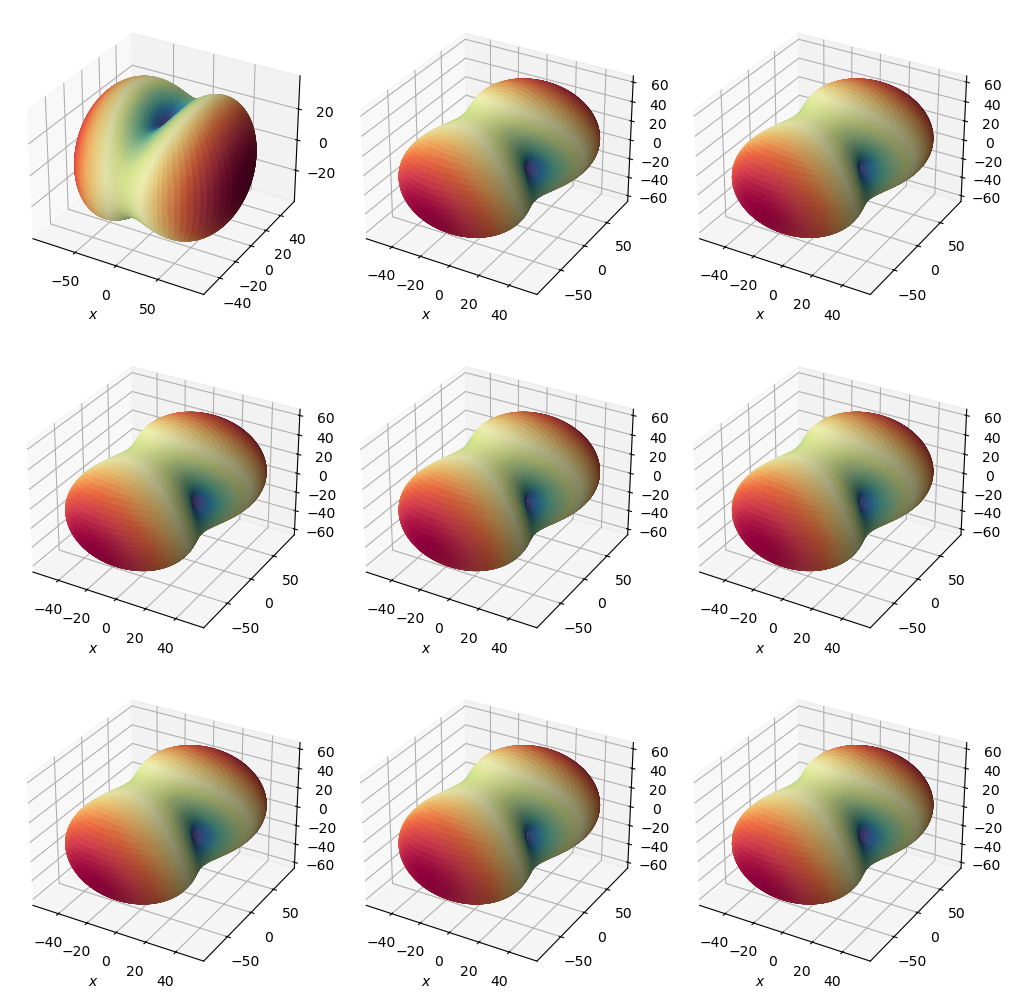

In [9]:
envelopes = [ref, rotation_0, rotation_1, rotation_2, rotation_3, rotation_4,
             rotation_5, rotation_6, rotation_7]

# make plot
fig, axes = plt.subplots(subplot_kw={"projection": "3d"}, ncols=3, nrows=3, figsize=(10, 10), constrained_layout=True)

for index, ax in enumerate(axes.flat):
    x, y, z = envelopes[index]
    ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=cm.Spectral_r(Tcolors))
    ax.set_xlabel(r'$x$')
    # ax.set_title(titles[index])

**There is something wrong here. TO FOLLOW. I think I'm getting confused between Euler rotations and orientations!**

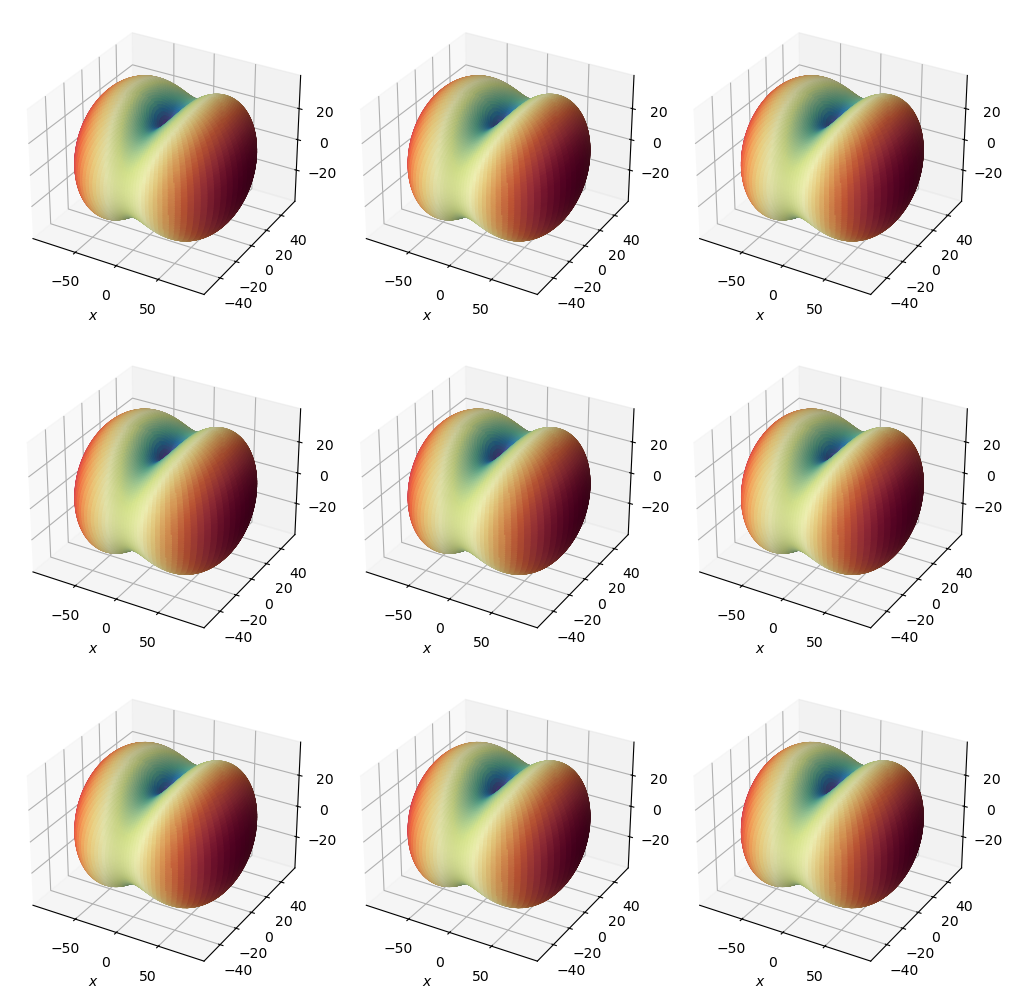

In [10]:
# generate values to plot the reference envelope when required
polar, azimuths = f.regular_S2_grid(n_squared=100)
T = f.Tvalues(trans=(90, 50, 20), azimuth=azimuths, polar=polar)
x, y, z = f.sph2cart(T, azimuths, polar)

ref = f.rotate(coordinates=(x, y, z), euler_ang=(0, 0, 0))

rotation_0 = f.rotate(coordinates=(x, y, z), euler_ang=(0, 180, 0))
rotation_1 = f.rotate(coordinates=(x, y, z), euler_ang=(0, -180, 0))
rotation_2 = f.rotate(coordinates=(x, y, z), euler_ang=(0, 0, 180))
rotation_3 = f.rotate(coordinates=(x, y, z), euler_ang=(0, 0, -180))
rotation_4 = f.rotate(coordinates=(x, y, z), euler_ang=(0, 180, 180))
rotation_5 = f.rotate(coordinates=(x, y, z), euler_ang=(0, -180, -180))
rotation_6 = f.rotate(coordinates=(x, y, z), euler_ang=(360, 0, 0))
rotation_7 = f.rotate(coordinates=(x, y, z), euler_ang=(-360, 0, 0))

envelopes = [ref, rotation_0, rotation_1, rotation_2, rotation_3, rotation_4,
             rotation_5, rotation_6, rotation_7]

# make plot
fig, axes = plt.subplots(subplot_kw={"projection": "3d"}, ncols=3, nrows=3, figsize=(10, 10), constrained_layout=True)

for index, ax in enumerate(axes.flat):
    x1, y1, z1 = envelopes[index]
    ax.plot_surface(x1, y1, z1, rstride=1, cstride=1, facecolors=cm.Spectral_r(Tcolors))
    ax.set_xlabel(r'$x$')
    # ax.set_title(titles[index])